# Logistic Regression

Do klasyfikacji można użyć niektórych algorytmów regresji (i na odwrót). 

**Regresja logistyczna** (zwana również Logit Regression) jest powszechnie używana do oszacowania prawdopodobieństwa, że instancja należy do konkretnej klasy (np. Jakie jest prawdopodobieństwo, że ta wiadomość e-mail jest spamem?).

Jeśli oszacowane prawdopodobieństwo jest większe niż 50%, wówczas model przewiduje, że instancja należy do tej klasy (zwanej klasą dodatnią, oznaczoną "1"), lub przewiduje, że nie (tj. Należy do klasy negatywnej oznaczonej "0"). To sprawia, że jest ona
klasyfikatorem binarnym.

# Szacowanie prawdopodobieństw

Jak to działa? Podobnie jak w modelu regresji liniowej, model regresji logistycznej oblicza ważoną sumę elementów wejściowych (plus wartość odchylenia -- bias), ale zamiast zwraca wynik bezpośrednio, jak ma to miejsce w przypadku modelu regresji liniowej, zwraca **logistic** tego wyniku:

$$
\hat p = h_{\theta}(X) = \sigma(\theta^T \cdot X)
$$

**Funkcja Logistyczna** - zwana także **logit**, oznaczona $\sigma$ - jest funkcją sigmoidalną (to jest w kształcie litery S), która zwraca liczbę z zakresu od $0$ do $1$. 

Jest ona zdefiniowana jak pokazano w

$$
\sigma(t) = \frac{1}{ 1 + exp(-t)} 
$$

Gdy model regresji logistycznej oszacuje prawdopodobieństwo $\hat p = h_{\theta}(X)$, że element $x$ należy do klasy dodatniej, może łatwo odzyskać efekt klasyfikacji $\hat y$:

$$
\hat y= 
\begin{cases}
0, & \text{if } \hat p < 0.5\\
1, & \text{if } \hat p \geq 0.5
\end{cases}
$$


# Training and Cost Function

Wiemy już jak jak model regresji logistycznej szacuje prawdopodobieństwa i prognozy. Ale w jaki sposób jest uczony? 

Celem uczenia jest ustawienie wektora parametrów $\theta$ tak, aby model 
  * oszacował wysokie prawdopodobieństwa dla pozytywnych instancji ($y = 1$) 
  * niskie prawdopodobieństwo dla negatywnych instancji ($y = 0$). 

Pomysł ten jest realizowany przez funkcję kosztów:

$$
C(\theta)= 
\begin{cases}
-log(\hat p), & \text{if } y=1\\
-log(1 - \hat p), & \text{if } y=0
\end{cases}
$$

Ta funkcja kosztu ma sens, ponieważ 
  
  * $- log (t)$ rośnie bardzo szybko, gdy $t$ zbliża się do 0, więc koszt będzie duży, jeśli model oszacuje prawdopodobieństwo bliskie $0$ dla pozytywnej instancji, a także będzie bardzo duży, jeśli model oszacuje prawdopodobieństwo bliskie $1$ dla negatywnej instancji. 
  * Z drugiej strony $- log(t)$ jest bliski $0$, gdy $t$ jest bliskie $1$, więc koszt będzie bliski $0$, jeśli szacowane prawdopodobieństwo jest bliskie $0$ dla negatywnej instancji lub bliskie $1$ dla pozytywnej instancji. 
  
Funkcja kosztów całego zbioru danych to po prostu średni koszt wszystkich elementów"

$$
J(\theta) = - \frac{1}{m} \sum_{i=1}^m \left[ y_i log(\hat p_i) + (1-y_i) log(1 -\hat p_i) \right]
$$

  * Zła wiadomość jest taka, że nie ma jawnego wzoru do obliczenia wartości $\theta$, który minimalizuje tę funkcję kosztu. 
  * Ale dobrą wiadomością jest to, że ta funkcja kosztu jest wypukła, więc Gradient Descent (lub jakikolwiek inny algorytm optymalizacyjny) gwarantuje znalezienie globalnego minimum (jeśli tempo uczenia się nie jest zbyt duże i wystarczająco długo czekamy).

# Zadanie 1

Za pomoca funkcji 

```python
sklearn.datasets.make_moons
```

wygeneruj 4 zbiory danych z parametrami:

  * n_samples=1000, noise=.05
  * n_samples=1000, noise=.3
  * n_samples=200, noise=.05
  * n_samples=200, noise=.3


In [1]:
import numpy as np
import sklearn.datasets

#low noise, plenty of samples, should be easy
X, y = sklearn.datasets.make_moons(n_samples=1000, noise=.05)

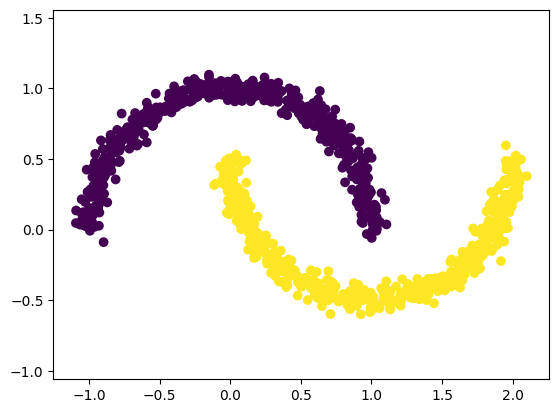

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=y)
plt.axis('equal')
plt.show()

# Zadanie 2


In [6]:
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


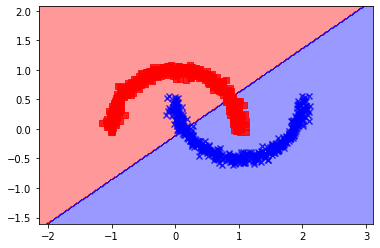

# Zad 
Wykonaj Logistyczną regresją na zbiorze iris.

Spróbujmy zbudować klasyfikator wykrywający typ Iris-Virginica oparty tylko na funkcji szerokości płatka.

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())


['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [4]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int32) # 1 if Iris-Virginica, else 0


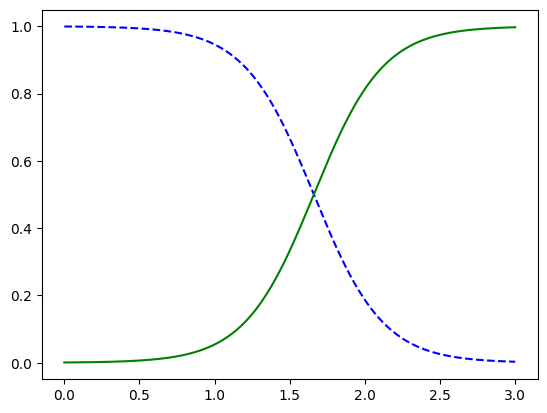

In [8]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = logistic_regression.predict_proba(X_new)

plt.plot(X_new,y_proba[:,0], color="blue", linestyle="--")
plt.plot(X_new, y_proba[:,1], color="green")
plt.show()

# Zad 
Wykonaj Logistyczną regresją na zbiorze iris.

Spróbujmy zbudować klasyfikator wykrywający typ Iris-Virginica oparty tylko na funkcji width oraz length.

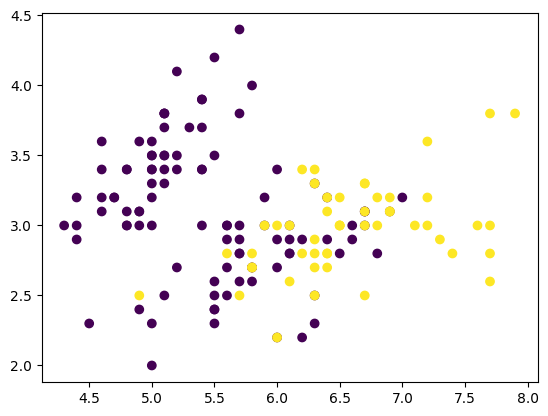

In [9]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

X = iris["data"][:, 0:2] 
y = (iris["target"] == 2).astype(np.int32) # 1 if Iris-Virginica, else 0

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()


# Softmax Regression

Model regresji logistycznej można uogólnić, aby obsługiwał wiele klas bezpośrednio, bez konieczności szkolenia i łączenia wielu klasyfikatorów binarnych. 

Nazywa się to **Regresją Softmax** lub Multinomial Logistic Regression.

Pomysł jest dość prosty: gdy poda się punkt $x$, model regresji Softmax 
  * najpierw oblicza wynik $s_k(x)$ dla każdej klasy $k$, 
  * a następnie szacuje prawdopodobieństwo każdej klasy przez zastosowanie funkcji softmax do wyniku. 

Równanie do obliczania $s_k(x)$ powinno wyglądać znajomo, ponieważ jest ono podobne do równania do przewidywania regresji liniowej:

$$
s_k(X) = \theta_k^T \cdot X
$$


Zauważ, że każda klasa ma swój własny dedykowany wektor parametrów $\theta_k$. Wszystkie te wektory są zwykle przechowywane jako wiersze w macierzy parametrów $\Theta$.

Po obliczeniu wyniku każdej klasy dla elementu $x \in X$ można oszacować prawdopodobieństwo $\hat p_k $, że należy on do klasy $k$ za pomocą funkcji softmax:

$$
\hat p_k = \sigma( S(X) )_k = \frac{ exp(s_k(x)) }{ \sum_{j=1}^{k} exp(s_k(x))}
$$
gdzie
  * $K$ oznacza ilość klas.
  * $S(X)$ jest wektorem zawierającym wyniki każdej klasy dla instancji $x$.
  * $\sigma( S(X) )_k$ jest szacowanym prawdopodobieństwem, że $x$ należy do klasy $k$
  
Podobnie jak klasyfikator Regresja logistyczna, klasyfikator Regresji Softmax przewiduje klasę o najwyższym szacowanym prawdopodobieństwie  

$$
\hat y = \mbox{argmax}_k \sigma( S(X) )_k =  \mbox{argmax}_k (\theta_k^T \cdot X)
$$

# Uczenie. 

Celem jest posiadanie modelu, który szacuje wysokie prawdopodobieństwo dla klasy docelowej (i w konsekwencji niskie prawdopodobieństwo dla pozostałych klas). 

## Entropią krzyżową

$$
J(\theta) = - \frac{1}{m} \sum_{i=1}^m \sum_{k=1}^K y_i^k log(\hat p _i ^k),
$$
gdzie 
  * $y_i^k$ jest równe $1$, jeśli klasą docelową dla $i$-tego wystąpienia jest $k$, w przeciwnym razie jest równa $0$.

Minimalizacja funkcji kosztu (entropii krzyżowej), powinna prowadzić do tego celu, ponieważ penalizuje model, gdy szacuje niskie prawdopodobieństwo dla klasy docelowej. Entropia krzyżowa jest często używana do mierzenia, jak dobrze zestaw oszacowanych prawdopodobieństw klas jest zgodny z klasami docelowymi.

## The cross entropy

The cross entropy between two probability distributions $p$ and $q$ is defined as 


$$
H(p,q) = -\sum_x p(x) log q(x)
$$

(at least when the distributions are discrete).

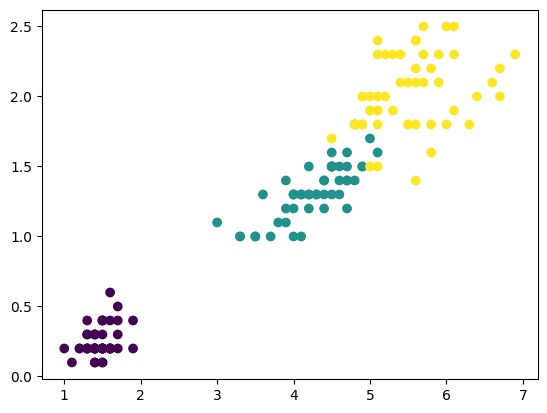

In [10]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]


plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


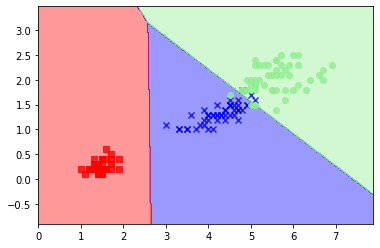